<center>
 # Introduction to Python Programming
## Final Project
### Submitted to: Flavio Pinheiro and Jorge Antunes

------------------------------------------------------------------------------------------------------

| First Name | Last Name | Student Number | E-mail Address
| ------------------ | ----------------- | --------------------------- |-------------------------
| Adeoluwa | Akande | D20170353 | D20170353@novaims.unl.pt
| Carolina | Araujo | M20180262 | m20180262@novaims.unl.pt
| Francisco | Freitas | M20170062 | m20170062@novaims.unl.pt
| Julian | Kuypers | M20180409 | m20180409@novaims.unl.pt
    
------------------------------------------------------------------------------------------------------

  </center>
<div style="text-align: center"> **Test** </div>
  

**Abstract**

Incidents could either be crimes or other emergency situations that require immediate attention and help. The availability of the crime database of London provides us with a unique opportunity to track crime incidents and explore crime patterns. This in turn will help the authorities to optimize resource allocation and improve emergency call response. 

The aim of our research will be to:
- Identify incidents patterns and hotspots
- Predict future occurrence of crime 
- Generate visualizations to help the police and emergency response 

## Dataset Description

To carry out this project, we made use of a dataset from the London data portal. The data contains reported cases of criminal activity from the London Police Department (SFPD). The data covers 01/01/2016 - 01/01/2017.

## Libraries installations and loading
### Please download the Folium package to access the interactive maps of the spatial analysis. Folium takes a long time to render, please feel free to skip it if you are pressed on time, we will show it during out presentation

In [68]:
import copy 
import pydot
import folium
import calendar
import itertools
import geopandas
import numpy as np
import pandas as pd
import seaborn as sb
from folium import plugins
from folium.plugins import HeatMap
from matplotlib import pyplot as plt
from sklearn import preprocessing, cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


### Loading Datasets

In [30]:
housingMean = pd.read_csv('Group7_LondonHousingMeanPrice.csv',encoding='utf-8')
AnalysisModel = pd.read_csv('Group7_AnalysisModel.csv',encoding='utf-8')
SampleAnalysisModel = pd.read_csv('Group7_SampleAnalysisModel.csv',encoding='utf-8')
AlgoModel = pd.read_csv('Group7_AlgoModel.csv',encoding='utf-8')
SampleAlgoModel = pd.read_csv('Group7_SampleAlgoModel.csv',encoding='utf-8')


**Housing Plots**

In [35]:
# use a random sample of rows of the dataset
sampleHousing = housingMean.sample(frac=1)


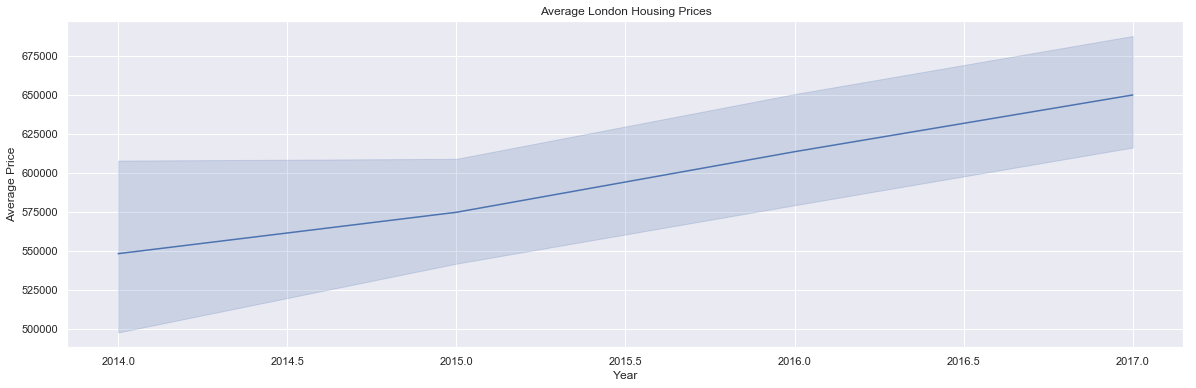

In [112]:
#Ploting average housing prices throughout the years
sb.set_style("darkgrid")
CrimeFig = sb.lineplot(x='Year', y='Average Price', data=housingMean).set_title('Average London Housing Prices')
plt.show()


# figGet = CrimeFig.get_figure()

#save image
# figGet.savefig('LondonAveragePrice14-17.png',bbox_inches='tight')

## **Analysis**

### Exploratory Analysis

In [44]:
AnalysisModel = AnalysisModel.drop(['Unnamed: 0'], axis=1)
AnalysisModel.head()

Longitude   Latitude Location  Month  Year                  Reported_by  \
0  -0.111497  51.518226   Street      1  2017        City of London Police   
1  -0.113256  51.516824   Street      1  2017        City of London Police   
2  -0.113767  51.517372   Street      1  2017        City of London Police   
3  -0.113767  51.517372   Street      1  2017        City of London Police   
4  -0.141722  51.564264   Street      1  2017  Metropolitan Police Service   

      Crime_type Borough  Average Price  \
0       Burglary  Camden      1046342.5   
1    Other theft  Camden      1046342.5   
2  Vehicle crime  Camden      1046342.5   
3  Vehicle crime  Camden      1046342.5   
4       Burglary  Camden      1046342.5   

                                Last_outcome_cat  
0              Offender given community sentence  
1  Investigation complete; no suspect identified  
2                      Status update unavailable  
3  Investigation complete; no suspect identified  
4  Investigation complete; no suspect identified

In [50]:
crimes = AnalysisModel

In [51]:
AnalysisModel['Year'].unique()

array([2017, 2015, 2016])

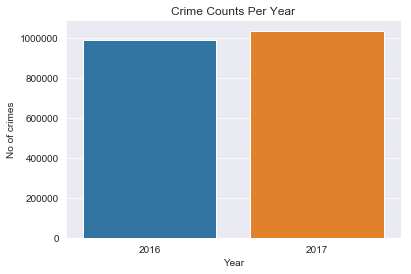

In [52]:
#crimes = pd.read_csv('IPCrimeGreaterLondon.csv')
crimes = crimes[(crimes['Year'] == 2016) | (crimes['Year'] == 2017)]
# No of crimes reported each year
fig = sb.countplot(x = 'Year', data = crimes).set_title('Crime Counts Per Year')
plt.ylabel('No of crimes')
plt.show()

#save image
# figGet = fig.get_figure()

# figGet.savefig('CrimeCountYear.png',bbox_inches='tight')


It can be seen from the figure above that although the number crimes reported in 2016 and 2017 are roughly the same, 2017 is slightly higher than 2016

Text(0,0.5,'No of Crimes')

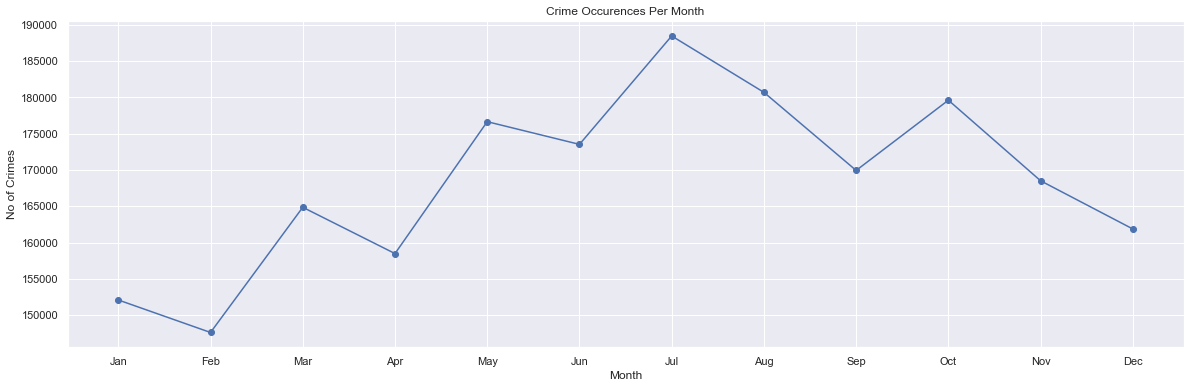

In [53]:
#Plotting the monthly trends in reported incidents
sb.set(rc={'figure.figsize' : (20,6)})
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#crimes.groupby(crimes.Date.dt.month)['Crime type'].count().plot(marker='o')
Crimefig = crimes.groupby('Month')['Crime_type'].count().plot(marker='o').set_title('Crime Occurences Per Month')
plt.xticks(np.arange(1,13), months)
plt.ylabel('No of Crimes')

#saving image
# figGet = Crimefig.get_figure()

# figGet.savefig('CrimeOccPerMonth.png',bbox_inches='tight')

From the above figure, we can see that crimes peaks in summer and drops in winter

Text(0,0.5,'No of Crimes')

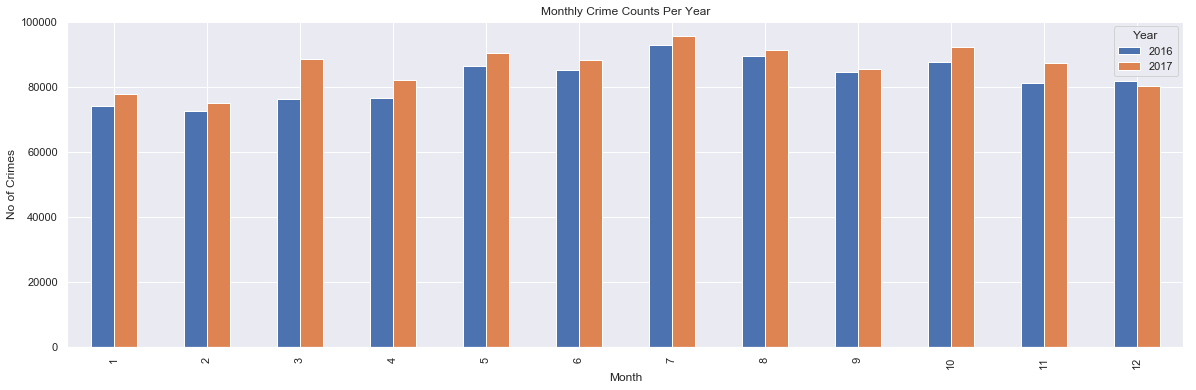

In [54]:
# Plotting the number of crimes for each month for the 2 years
Crimefig = crimes.groupby(['Month','Year'])['Crime_type'].count().unstack().plot(kind='bar').set_title('Monthly Crime Counts Per Year')
plt.ylabel('No of Crimes')

#saving image
# figGet = Crimefig.get_figure()

# figGet.savefig('MonthlyCrimeCount.png',bbox_inches='tight')

The summer peak and winter drop trends is consistent for 2016 and 2017. Roughly equal amount of crimes was reported each month in 2016 and 2017

Text(0,0.5,'No of Crimes')

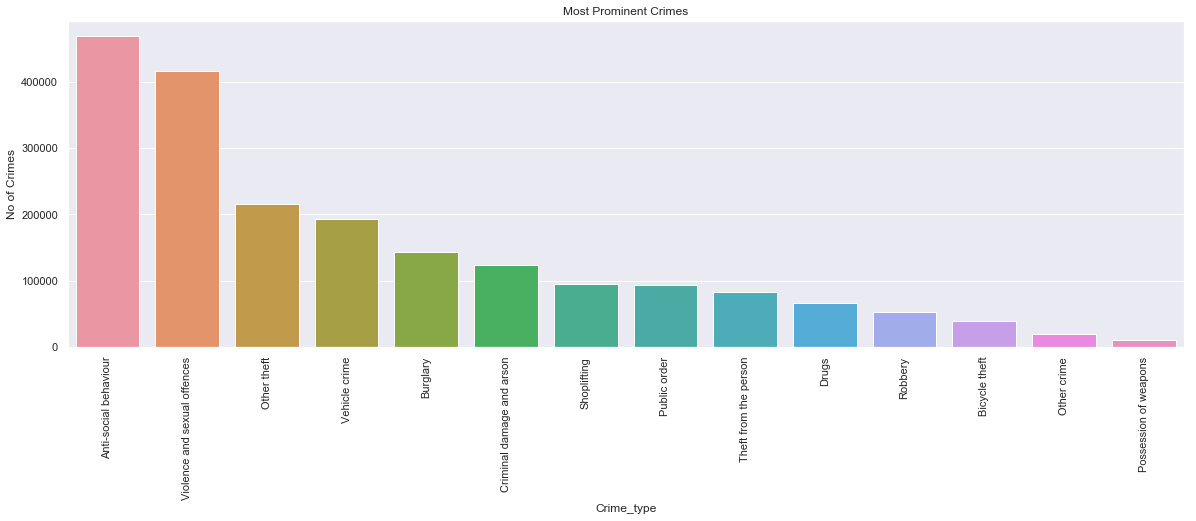

In [55]:
# Types of incidents
#sb.set(rc={'figure.figsize' : (20,6)})
Crimefig = sb.countplot(x='Crime_type', data = crimes, order=crimes['Crime_type'].value_counts().index).set_title('Most Prominent Crimes')
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')


#saving image
# figGet = Crimefig.get_figure()

# figGet.savefig('MostProminentCrimes.png',bbox_inches='tight')

As indicated in the chart above, the top five crimes in London in 2016 and 2017 are:
1. Anti social beehaviour
2. Violence and sexual offenses
3. Other theft
4. Vehiclee crimes
5. Bulgary

Text(0,0.5,'No of Crimes')

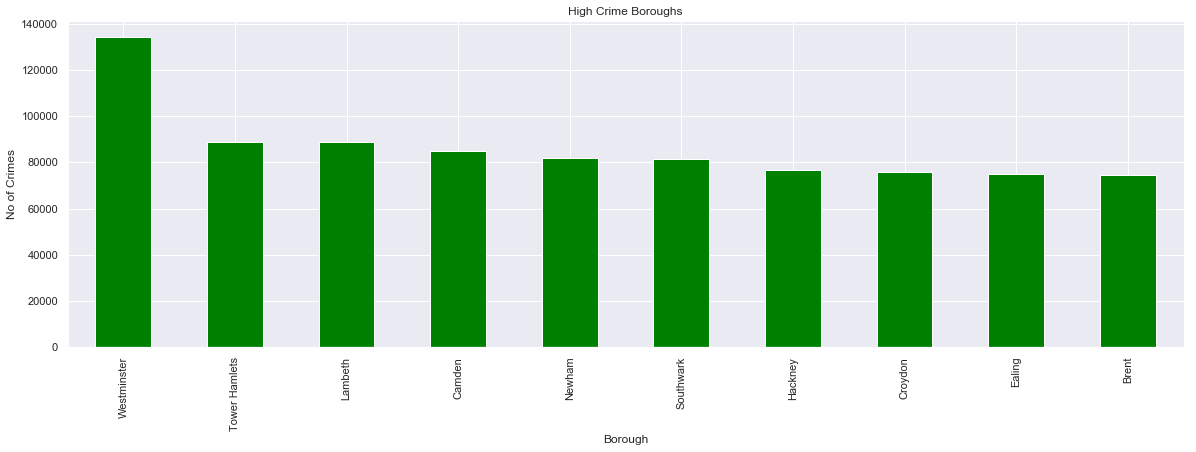

In [56]:
# Top 10 locations of crime
crime_loc = crimes.groupby('Borough')['Crime_type'].count().sort_values(ascending=False)
crime_loc = crime_loc[0:10]
CrimeFig = crime_loc.plot(kind = 'bar', color = 'green').set_title('High Crime Boroughs')
plt.ylabel('No of Crimes')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('HighCrimeBoroughs.png',bbox_inches='tight')

From the chart above, Westminister had a significantly higher amount of crime than other borough

Text(0,0.5,'Average Housing Price')

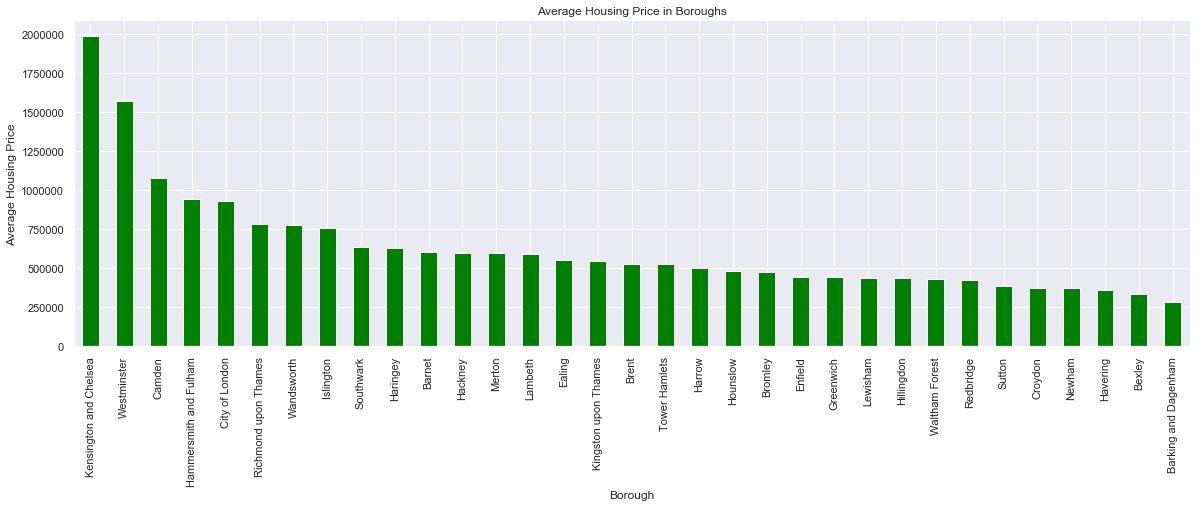

In [57]:
#house_loc = crimes.groupby('Borough')
house_loc = crimes.groupby([crimes.Borough])['Average Price'].mean().sort_values(ascending=False)
CrimeFig= house_loc.plot(kind = 'bar', color = 'green').set_title('Average Housing Price in Boroughs')
plt.ylabel('Average Housing Price')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('AverageHousingPricePerBorough.png',bbox_inches='tight')

Text(0,0.5,'No of Crimes')

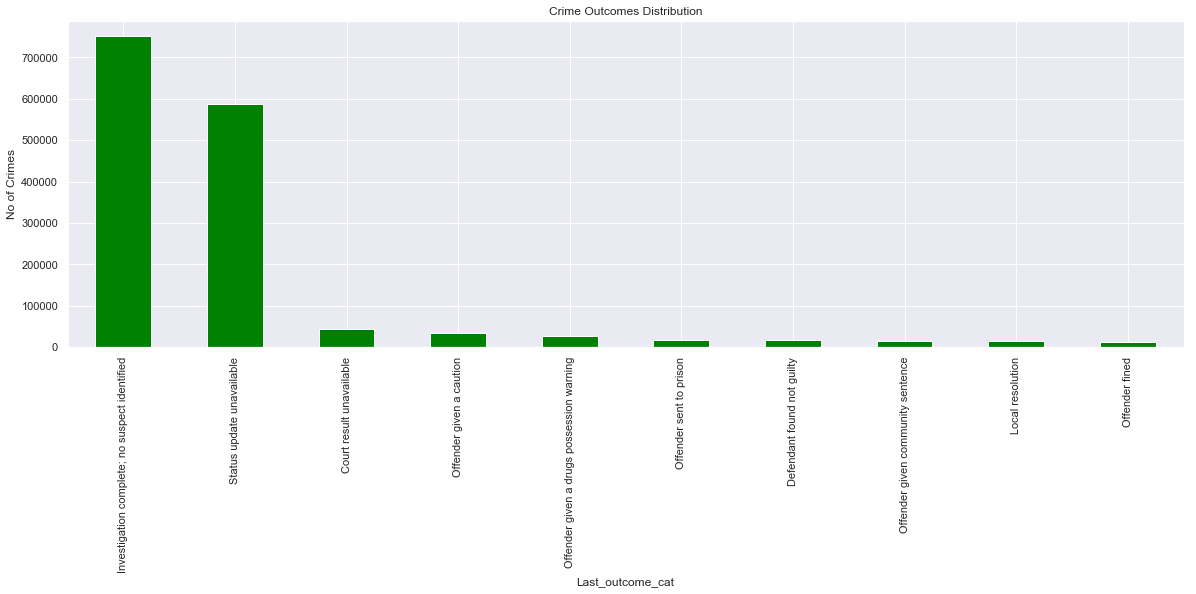

In [58]:
# Top 10 crime outcomes
crime_outcome = crimes.groupby('Last_outcome_cat')['Crime_type'].count().sort_values(ascending=False)
crime_outcome = crime_outcome[0:10]
CrimeFig = crime_outcome.plot(kind = 'bar', color = 'green').set_title('Crime Outcomes Distribution')
plt.ylabel('No of Crimes')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('CrimeOutcomesDistribution.png',bbox_inches='tight')

It is obvious from the above chart that the police are usually ineffective at identifying suspects of crimes. Also, a lot of crimes go unsolved in London

### Analyzing top 5 crimes in London

In [59]:
top_crime = crimes[(crimes['Crime_type'] == 'Anti-social behaviour') | (crimes['Crime_type'] == 'Violence and sexual offences') 
                   | (crimes['Crime_type'] == 'Vehicle crime') 
                   | (crimes['Crime_type'] == 'Burglary') | (crimes['Crime_type'] == 'Criminal damage and arson')]

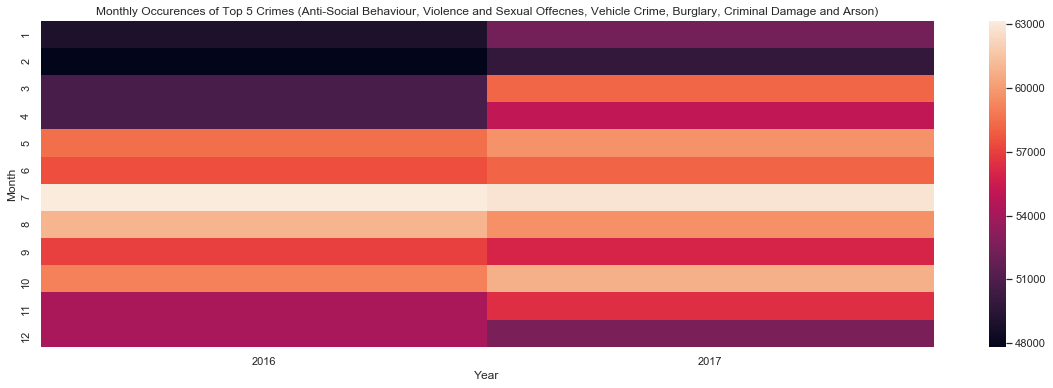

In [60]:
# Monthly trend of top 5 crimes
temp = top_crime.pivot_table(values = 'Crime_type', index='Month',
                            columns = 'Year', aggfunc=np.size)
CrimeFig = sb.heatmap(temp).set_title('Monthly Occurences of Top 5 Crimes (Anti-Social Behaviour, Violence and Sexual Offecnes, Vehicle Crime, Burglary, Criminal Damage and Arson)')

#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('top5heatmap.png',bbox_inches='tight')

The heatmap above shows that intense criminal activities happened in summer with a peak in July in 2016 and 2017

Text(0,0.5,'No of Crimes')

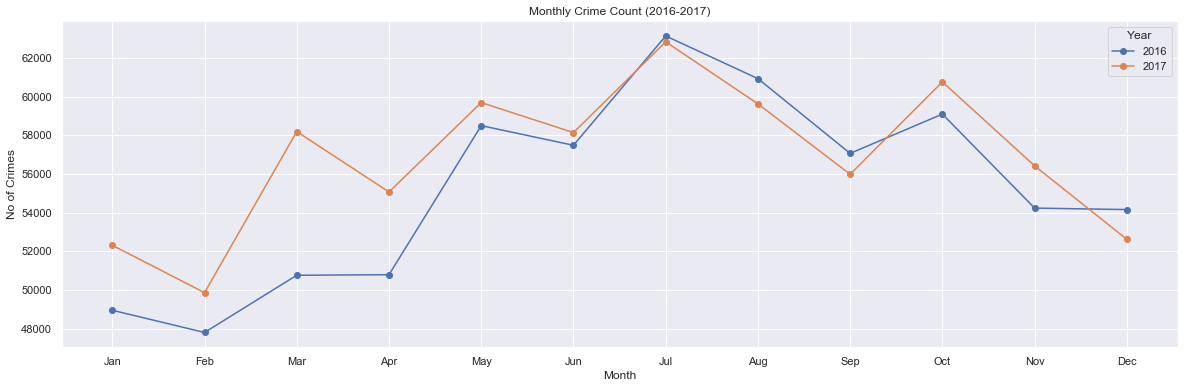

In [61]:
CrimeFig = top_crime.groupby(['Month', 'Year'])['Crime_type'].count().unstack().plot(marker='o').set_title('Monthly Crime Count (2016-2017)')
plt.xticks(np.arange(1,13), months)
plt.ylabel('No of Crimes')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('MonthlyCrimeCount1617.png',bbox_inches='tight')

This graph conveys the same result as the previous heatmap albeit in a clearer way.

In [62]:
top_crime.reset_index(inplace=True)

Text(156.5,0.5,'Type of Crime')

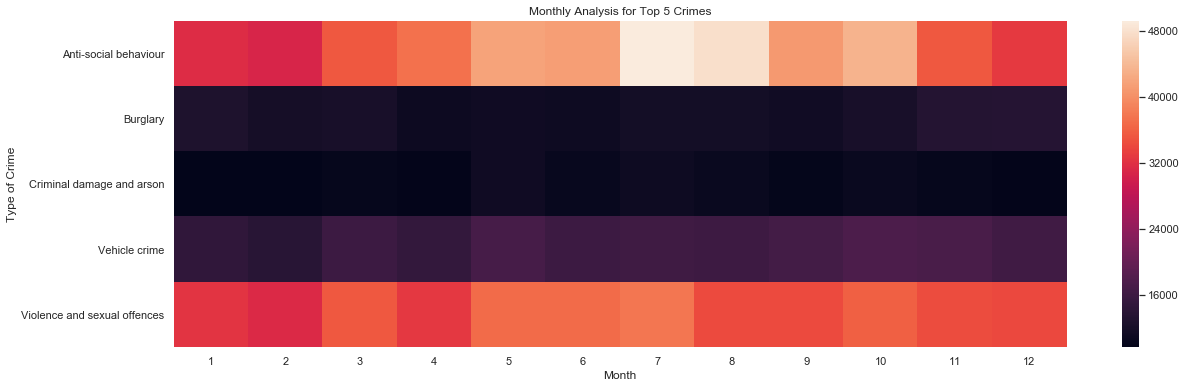

In [63]:
# Monthly trend in types of crime
temp = top_crime.pivot_table(values = 'index', index='Crime_type',
                            columns = 'Month', aggfunc=np.size)
CrimeFig = sb.heatmap(temp).set_title('Monthly Analysis for Top 5 Crimes')
plt.ylabel('Type of Crime')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('monthlyTrendsTop5.png',bbox_inches='tight')

The top crimes (Anti-social behaviour and violence and sexual offences) tend to have an annual variation (peaks in summer, drops in winter). The "not so top" crimes (Burglary and criminal damagee and arson) tend to have the same rate all year round. 

Text(0,0.5,'No of Crimes')

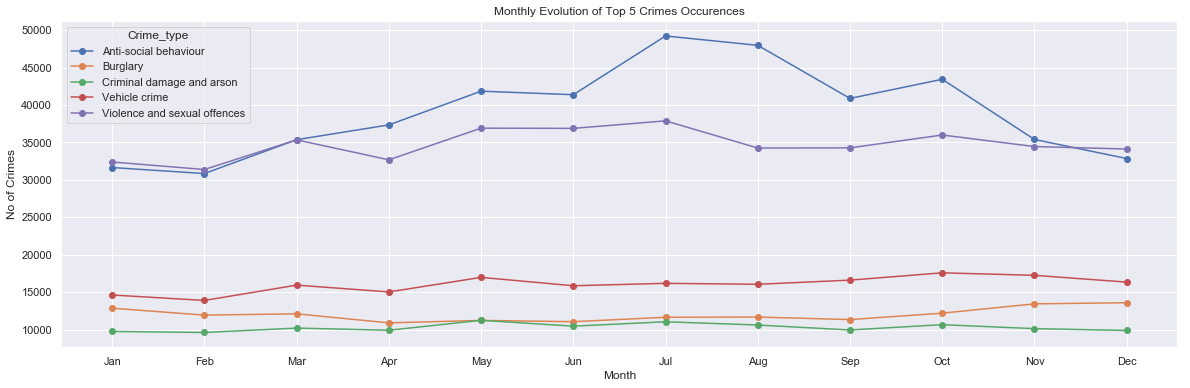

In [64]:
CrimeFig = top_crime.groupby(['Month', 'Crime_type'])['index'].count().unstack().plot(marker='o').set_title('Monthly Evolution of Top 5 Crimes Occurences')
#top_crime.groupby(['Month', 'Year'])['Unnamed: 0'].count().unstack().plot(marker='o')
plt.xticks(np.arange(1, 13),months)
plt.ylabel('No of Crimes')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('monthlyTrendsTop5Line.png',bbox_inches='tight')

The chart above reinforces the previous point made with the heatmap but in a clearer way

In [65]:
# Location description for top 5 crimes
temp=list(top_crime['Borough'].value_counts()[:10].index)
top_crime['Borough']=np.where(top_crime['Borough'].isin(temp),top_crime['Borough'],'OTHER')
top_crime_2 = top_crime[top_crime.Borough != "OTHER"]
top_crime_2['Borough'].value_counts()


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Westminster      68047
Tower Hamlets    61292
Lambeth          56689
Croydon          54222
Newham           53936
Ealing           53130
Brent            52615
Southwark        50565
Hillingdon       48471
Hackney          48225
Name: Borough, dtype: int64

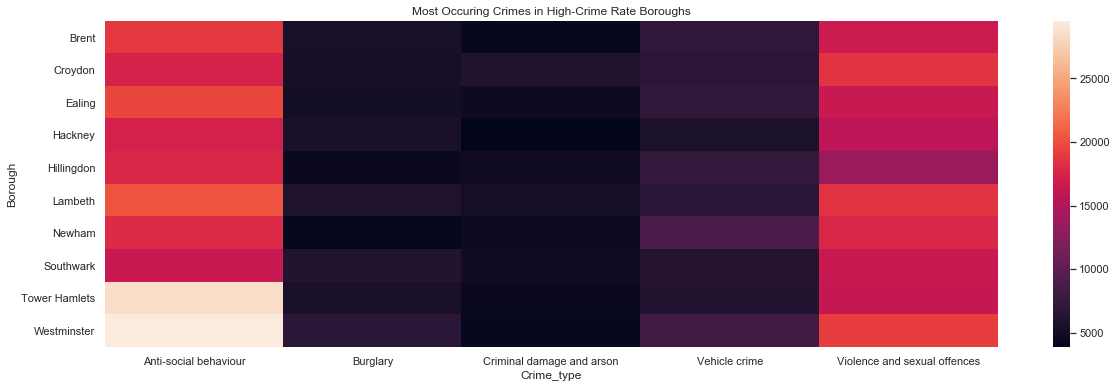

In [66]:
temp= top_crime_2.pivot_table(values='index', index='Borough', columns='Crime_type', aggfunc=np.size)
CrimeFig = sb.heatmap(temp).set_title('Most Occuring Crimes in High-Crime Rate Boroughs')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('MostOccuringCrimesBoroughs.png',bbox_inches='tight')

We can see from the above chart that Anti-social behaviour is particulary high in Tower Hamlets and Westminister

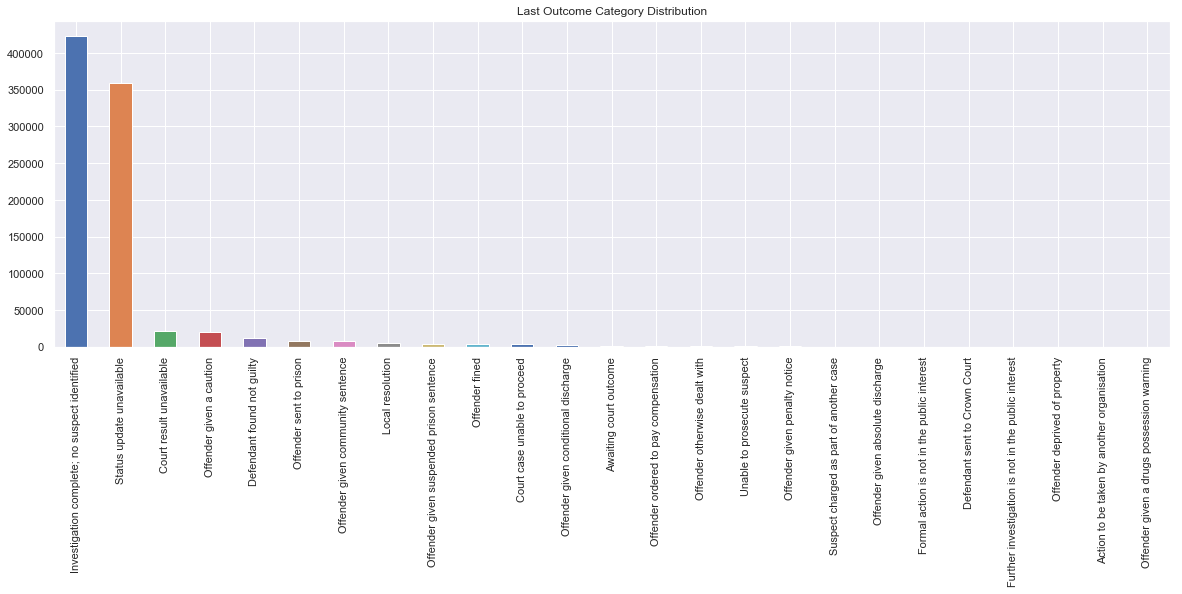

In [67]:
CrimeFig = top_crime['Last_outcome_cat'].value_counts().plot(kind='bar').set_title('Last Outcome Category Distribution')


#saving image
# figGet = CrimeFig.get_figure()

# figGet.savefig('LastOutcomeDist.png',bbox_inches='tight')

We can see from the above that a lot of crime goes unsolved in London

## Spatial Analysis

In [123]:
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import Fullscreen

In [125]:
# Visualizing a heatmap of crimes in london on a map

map_hooray = folium.Map(location=[51.5, -0.09],
                    zoom_start = 10) 

# Ensure you're handing it floats
top_crime['Latitude'] = top_crime['Latitude'].astype(float)
top_crime['Longitude'] = top_crime['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = top_crime[top_crime['Crime_type']=='Violence and sexual offences'] # Reducing data size so it runs faster
heat_df[['Year']] = heat_df[['Year']].astype(str)
heat_df = heat_df[heat_df['Year']=='2017'] # Reducing data size so it runs faster
heat_df = heat_df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# adding a button to enable/disable zoom scrolling
plugins.ScrollZoomToggler().add_to(map_hooray)

# adding a button to switch to full screen mode
# plugins.Fullscreen(
#     position='topright',
#     title='Expand me',
#     title_cancel='Exit me',
#     force_separate_button=True).add_to(map_hooray)

# Display the map
map_hooray

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [ ]:
#Visulizing crime counts in London on a map

heat_df3 = top_crime[top_crime['Crime_type']=='Anti-social behaviour'] # Reducing data size so it runs faster
heat_df3[['Year']] = heat_df3[['Year']].astype(str)
heat_df3 = heat_df3[heat_df3['Year']=='2017'] # Reducing data size so it runs faster
heat_df3 = heat_df3[['Latitude', 'Longitude', 'Unnamed: 0']]
#heat_df3.head()
test = np.array(heat_df3)
n = folium.Map([51.5, -0.09], zoom_start=8)

plugins.MarkerCluster(test).add_to(n)

n



In [ ]:
# creating a function for an inset map

from __future__ import (absolute_import, division, print_function)

import json

from branca.element import CssLink, Figure, JavascriptLink, MacroElement

from folium.raster_layers import TileLayer

from jinja2 import Template


class MiniMap(MacroElement):
    """Add a minimap (locator) to an existing map.
    Uses the Leaflet plugin by Norkart under BSD 2-Clause "Simplified" License.
    https://github.com/Norkart/Leaflet-MiniMap
    
    """

    _template = Template("""
        {% macro script(this, kwargs) %}
        var {{ this.tile_layer.get_name() }} = L.tileLayer(
        '{{ this.tile_layer.tiles }}',
        {{ this.tile_layer.options }} );
        var {{ this.get_name() }} = new L.Control.MiniMap( {{this.tile_layer.get_name()}},
         {{ this.options }});
        {{ this._parent.get_name() }}.addControl({{ this.get_name() }});
        {% endmacro %}
    """)  # noqa

    def __init__(self, tile_layer=None, position='bottomright', width=150,
                 height=150, collapsed_width=25, collapsed_height=25,
                 zoom_level_offset=-5, zoom_level_fixed=None,
                 center_fixed=False, zoom_animation=False,
                 toggle_display=False, auto_toggle_display=False,
                 minimized=False):

        super(MiniMap, self).__init__()
        self._name = 'MiniMap'

        if tile_layer is None:
            self.tile_layer = TileLayer()
        elif isinstance(tile_layer, TileLayer):
            self.tile_layer = tile_layer
        else:
            self.tile_layer = TileLayer(tile_layer)

        options = {
            'position': position,
            'width': width,
            'height': height,
            'collapsedWidth': collapsed_width,
            'collapsedHeight': collapsed_height,
            'zoomLevelOffset': zoom_level_offset,
            'zoomLevelFixed': zoom_level_fixed,
            'centerFixed': center_fixed,
            'zoomAnimation': zoom_animation,
            'toggleDisplay': toggle_display,
            'autoToggleDisplay': auto_toggle_display,
            'minimized': minimized,
        }
        self.options = json.dumps(options, sort_keys=True, indent=2)

    def render(self, **kwargs):
        figure = self.get_root()
        assert isinstance(figure, Figure), ('You cannot render this Element '
                                            'if it is not in a Figure.')
        super(MiniMap, self).render()

        figure.header.add_child(JavascriptLink('https://cdnjs.cloudflare.com/ajax/libs/leaflet-minimap/3.6.1/Control.MiniMap.js'))  # noqa

        figure.header.add_child(CssLink('https://cdnjs.cloudflare.com/ajax/libs/leaflet-minimap/3.6.1/Control.MiniMap.css'))  # noqa

In [ ]:
# plotting a chropleth map of average house prices

house_price = crimes[['Borough', 'Average Price']]
borough_house_price = house_price.groupby([house_price.Borough])['Average Price'].mean()
borough_house_price = pd.DataFrame(borough_house_price)
borough_house_price.reset_index(inplace=True)
london_borough_geo = geopandas.read_file('test2.geojson')
london_borough_geo.rename(columns={"NAME_3": "Borough"}, inplace=True)
london_borough_geo = london_borough_geo.merge(borough_house_price, on='Borough')
london_borough_geo.drop(['Average Price'], axis=1, inplace=True)

m = folium.Map(location = [51.5, -0.09], zoom_start = 10)
m.choropleth(
 geo_data=london_borough_geo,
 name='choropleth',
 data=borough_house_price,
 columns=['Borough', 'Average Price'],
 #key_on='feature.properties.Borough',
 key_on='feature.properties.Borough',
 fill_color='OrRd',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Average Housing Price (Euros)',
 #threshold_scale=[0, 100, 200, 300, 500, 1000 ],
 highlight=True
 #reset = True
)
folium.LayerControl().add_to(m)


#from folium.plugins import MiniMap

#adding inset map
minimap = MiniMap(toggle_display=True, zoom_level_offset=-5, tile_layer="OpenStreetMap")
minimap.add_to(m)

# adding a button to switch to full screen mode
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

# adding a button to enable/disable zoom scrolling
plugins.ScrollZoomToggler().add_to(m)

m

In [ ]:
# plotting choropleth map of counts of crime

crime_borough = crimes.groupby('Borough')['Unnamed: 0'].count().sort_values(ascending=False)
#crime_loc = crime_loc[0:10]
crime_borough = pd.DataFrame(crime_borough)
crime_borough.reset_index(inplace=True)
crime_borough_geo = geopandas.read_file('test2.geojson')
crime_borough_geo.rename(columns={"NAME_3": "Borough"}, inplace=True)
crime_borough_geo = crime_borough_geo.merge(crime_borough, on='Borough')
crime_borough_geo.drop(['Unnamed: 0'], axis=1, inplace=True)

m = folium.Map(location = [51.5, -0.09], zoom_start = 10)
m.choropleth(
 geo_data=crime_borough_geo,
 name='choropleth',
 data=crime_borough,
 columns=['Borough', 'Unnamed: 0'],
 #key_on='feature.properties.Borough',
 key_on='feature.properties.Borough',
 fill_color='OrRd',
 fill_opacity=0.6,
 line_opacity=0.2,
 legend_name='Counts of crime',
 #threshold_scale=[0, 100, 200, 300, 500, 1000 ],
 highlight=True
 #reset = True
)
folium.LayerControl().add_to(m)


#from folium.plugins import MiniMap

#adding inset map
minimap = MiniMap(toggle_display=True, zoom_level_offset=-5, tile_layer="OpenStreetMap")
minimap.add_to(m)

# adding a button to switch to full screen mode
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

# adding a button to enable/disable zoom scrolling
plugins.ScrollZoomToggler().add_to(m)

m

## Prediction Models

In [69]:
df = SampleAlgoModel

In [72]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

Longitude   Latitude Location  Month  Year                  Reported_by  \
0  -0.111497  51.518226   Street      1  2017        City of London Police   
1  -0.113767  51.517372   Street      1  2017        City of London Police   
2  -0.113767  51.517372   Street      1  2017        City of London Police   
3  -0.141722  51.564264   Street      1  2017  Metropolitan Police Service   
4  -0.141722  51.564264   Street      1  2017  Metropolitan Police Service   

      Crime_type Borough  Average Price  \
0       Burglary  Camden      1046342.5   
1  Vehicle crime  Camden      1046342.5   
2  Vehicle crime  Camden      1046342.5   
3       Burglary  Camden      1046342.5   
4  Vehicle crime  Camden      1046342.5   

                                Last_outcome_cat  
0              Offender given community sentence  
1                      Status update unavailable  
2  Investigation complete; no suspect identified  
3  Investigation complete; no suspect identified  
4  Investigation complete; no suspect identified

In [73]:
#check for correlation
#user pd.DataFrame.corr(method='pearson') to calculate correlation between columns

corrdf = df.corr(method='pearson')
corrdf

Longitude  Latitude     Month      Year  Average Price
Longitude       1.000000  0.055584 -0.004075  0.002355      -0.244225
Latitude        0.055584  1.000000  0.003289  0.003618       0.012376
Month          -0.004075  0.003289  1.000000 -0.016292       0.039853
Year            0.002355  0.003618 -0.016292  1.000000       0.053113
Average Price  -0.244225  0.012376  0.039853  0.053113       1.000000

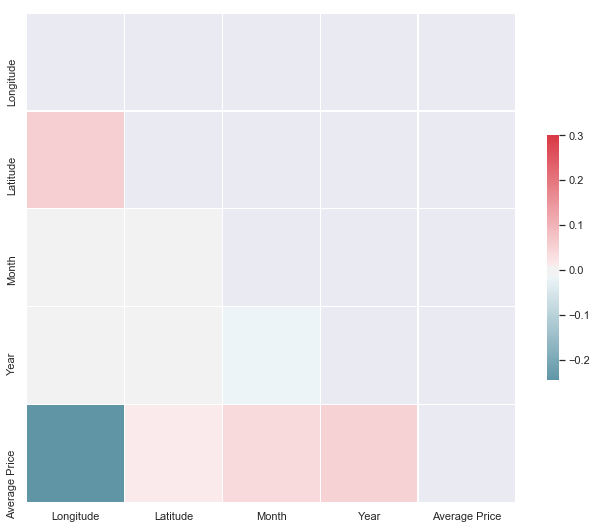

In [74]:
#Plot correlation matrix - mask removes unnecessary repetitions of values
mask = np.zeros_like(corrdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corrdf, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### There are no high correlations

In [75]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month

### We are training on 2016 - testing on 2017

In [77]:
NewSampleCrime16 = df.loc[df['Year'] == 2016] 
NewSampleCrime17 = df.loc[df['Year'] == 2017] 
NewSampleCrime16.reset_index()
NewSampleCrime17.reset_index()

index  Longitude   Latitude        Location  Month  Year  \
0            0  -0.111497  51.518226          Street      1  2017   
1            1  -0.113767  51.517372          Street      1  2017   
2            2  -0.113767  51.517372          Street      1  2017   
3            3  -0.141722  51.564264          Street      1  2017   
4            4  -0.141722  51.564264          Street      1  2017   
5            5  -0.140765  51.563323          Street      1  2017   
6            6  -0.142493  51.563044          Street      1  2017   
7            7  -0.143049  51.563215          Street      1  2017   
8            8  -0.143286  51.563776          Street      1  2017   
9            9  -0.143049  51.563215          Street      1  2017   
10          10  -0.143049  51.563215          Street      1  2017   
11          11  -0.147903  51.563058          Street      1  2017   
12          12  -0.150701  51.562374          Street      1  2017   
13          13  -0.150701  51.562374          Street      1  2017   
14          14  -0.144852  51.561805          Street      1  2017   
15          15  -0.144852  51.561805          Street      1  2017   
16          16  -0.148958  51.557328          Street      1  2017   
17          17  -0.146659  51.556033          Street      1  2017   
18          18  -0.148958  51.557328          Street      1  2017   
19          19  -0.145918  51.556516  Petrol Station      1  2017   
20          20  -0.148560  51.555775          Street      1  2017   
21          21  -0.148958  51.557328          Street      1  2017   
22          22  -0.145617  51.555073          Street      1  2017   
23          23  -0.148958  51.557328          Street      1  2017   
24          24  -0.145918  51.556516  Petrol Station      1  2017   
25          25  -0.145617  51.555073          Street      1  2017   
26          26  -0.146659  51.556033          Street      1  2017   
27          27  -0.145617  51.555073          Street      1  2017   
28          28  -0.148958  51.557328          Street      1  2017   
29          29  -0.145617  51.555073          Street      1  2017   
...        ...        ...        ...             ...    ...   ...   
681487  800926   0.016638  51.557962          Street     11  2017   
681488  800927   0.017535  51.555726          Street     11  2017   
681489  800928   0.016065  51.556731          Street     11  2017   
681490  800929   0.016065  51.556731          Street     11  2017   
681491  800930   0.013707  51.555612          Street     11  2017   
681492  800931   0.017535  51.555726          Street     11  2017   
681493  800932   0.016065  51.556731          Street     11  2017   
681494  800933   0.008432  51.556044          Street     11  2017   
681495  800934   0.012884  51.556255          Street     11  2017   
681496  800935   0.012884  51.556255          Street     11  2017   
681497  800936   0.012884  51.556255          Street     11  2017   
681498  800937   0.008957  51.556511          Street     11  2017   
681499  800938   0.009483  51.556988          Street     11  2017   
681500  800939   0.015245  51.554830          Street     11  2017   
681501  800940   0.020465  51.556089          Street     11  2017   
681502  800941   0.019427  51.555783          Street     11  2017   
681503  800942   0.018647  51.556732          Street     11  2017   
681504  800943   0.017197  51.554931          Street     11  2017   
681505  800944   0.017737  51.556379          Street     11  2017   
681506  800945   0.017197  51.554931          Street     11  2017   
681507  800946   0.015245  51.554830          Street     11  2017   
681508  800947   0.011372  51.554671          Street     11  2017   
681509  800948   0.006540  51.551418          Street     11  2017   
681510  800949   0.008339  51.551963          Street     11  2017   
681511  800950   0.006540  51.551418          Street     11  2017   
681512  800951   0.011372  51.554671          Street     11  2017   
681513 

In [78]:
train = NewSampleCrime16  
test= NewSampleCrime17.drop(['Crime_type'],axis=1)
test2 = NewSampleCrime17
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662928 entries, 128005 to 1345021
Data columns (total 10 columns):
Longitude           662928 non-null float64
Latitude            662928 non-null float64
Location            662928 non-null object
Month               662928 non-null int64
Year                662928 non-null int64
Reported_by         662928 non-null object
Crime_type          662928 non-null object
Borough             662928 non-null object
Average Price       662928 non-null float64
Last_outcome_cat    422742 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 55.6+ MB


### Label Encoding Categorical Values

In [80]:
#Encoding the categorical variables
enc = LabelEncoder()
train["Reported_by"] = enc.fit_transform(train["Reported_by"])
wnc = LabelEncoder()
train["Location"] = wnc.fit_transform(train["Location"])
cat_encoder = LabelEncoder()
cat_encoder.fit(train["Crime_type"])
train["CrimeEncoded"]= cat_encoder.transform(train["Crime_type"])
bor = LabelEncoder()
train['Borough'] = bor.fit_transform(train['Borough'])


# print(cat_encoder.classes_)
enc = LabelEncoder()
test["Borough"]= enc.fit_transform(test["Borough"])
loc = LabelEncoder()
test["Location"]= loc.fit_transform(test["Location"])
rep = LabelEncoder()
test["Reported_by"]= rep.fit_transform(test["Reported_by"])


#Test2

enc2 = LabelEncoder()
test2["Borough"]= enc2.fit_transform(test["Borough"])
loc2 = LabelEncoder()
test2["Location"]= loc2.fit_transform(test["Location"])
rep2 = LabelEncoder()
test2["Reported_by"]= rep2.fit_transform(test["Reported_by"])
cat_encoder2 = LabelEncoder()
cat_encoder2.fit(train["Crime_type"])
# print(cat_encoder2.classes_)
test2["CrimeEncoded"]= cat_encoder2.transform(test2["Crime_type"])
# wnc = LabelEncoder()
# test["DayOfWeek"] = wnc.fit_transform(test["DayOfWeek"])
# print(train.columns)
# print(test.columns)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [84]:
#changing coumn order to index more easily
train = train[['Crime_type','Longitude','Latitude','Location','Month',
               'Year','Reported_by','Borough','Average Price','CrimeEncoded']]
train.head()

Crime_type  Longitude   Latitude  Location  Month  Year  \
128005  Anti-social behaviour  -0.114954  51.518632         5      1  2016   
128006  Anti-social behaviour  -0.112422  51.515381         5      1  2016   
128007  Anti-social behaviour  -0.111497  51.518226         5      1  2016   
128008  Anti-social behaviour  -0.114954  51.518632         5      1  2016   
128009               Burglary  -0.140765  51.563323         5      1  2016   

        Reported_by  Borough  Average Price  CrimeEncoded  
128005            0        5      1062605.5             0  
128006            0        5      1062605.5             0  
128007            0        5      1062605.5             0  
128008            0        5      1062605.5             0  
128009            1        5      1062605.5             1

In [85]:
#determine training (2016) features and testing (2017) features 
## sample 6000 random rows so to make the features and targets smaller - the models will run faster

features_train = train[['Longitude','Latitude','Location','Month','Year','Reported_by','Borough','Average Price']].sample(n=6000)
y_train = train['CrimeEncoded'].sample(n=6000)

features_test = test2[['Longitude','Latitude','Location','Month','Year','Reported_by','Borough','Average Price']].sample(n=6000)
y_test = test2['CrimeEncoded'].sample(n=6000)


features_trainNoPrice = train[['Longitude','Latitude','Location','Month','Year','Reported_by','Borough']].sample(n=6000)
y_trainNoPrice = train['CrimeEncoded'].sample(n=6000)

features_testNoPrice = test2[['Longitude','Latitude','Location','Month','Year','Reported_by','Borough']].sample(n=6000)
y_testNoPrice = test2['CrimeEncoded'].sample(n=6000)

### When writing the report we made the models go through several for loops to find the best parameters. Here we have set the models with the best parameters, without loops.

### we ran the models with average price, and without to test whether price influenced our model significantly. Here we are only running them with average price

### Random Forest Classifier

In [87]:
#to save values from for loops
rf_list = []

In [88]:
#to save values from for loops
rf_listNoPrice = []

In [89]:
trees = 60
depth = 3
criterion = 'gini'
clf = RandomForestClassifier(n_estimators=trees, max_depth=depth, criterion=criterion)
clf.fit(features_train, y_train)
preds = clf.predict(features_test)
predProb = np.array(clf.predict_proba(features_test))
comparison = pd.crosstab(y_test, preds, normalize='index')
# Use the forest's predict method on the test data
# Calculate the absolute errors
errors = abs(preds - y_train)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

# Log loss
logLoss = log_loss(y_train, predProb) 
print('Log loss:', round(np.mean(logLoss), 4), 'degrees.')

rf_list.append([trees, depth, round(np.mean(logLoss),4), round(np.mean(errors),4), criterion])

Mean Absolute Error: 1.9298 degrees.
Log loss: 1.4626 degrees.


In [ ]:
#saving values in lists to dataframes

# rf_df = pd.DataFrame(rf_list, columns=['Trees', 'Depth', 'LogLoss', 'Mean Absolute Error', 'Criterion'])
# rfNoPrice_df = pd.DataFrame(rf_listNoPrice, columns=['Trees', 'Depth', 'LogLoss', 'Mean Absolute Error', 'Criterion'])

In [ ]:
#Save tree model to computer

# Limit depth of tree to 3 levels
clf_small = RandomForestRegressor(n_estimators=60, max_depth = 3)
clf_small.fit(features_train, y_train)
# Extract the small tree
tree_small = clf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = '1small_tree.dot', feature_names = features_train.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('1small_tree.dot')
graph.write_png('3-60small_tree.png')

### Gradient Boosting Tree Model

In [90]:
rf_boost_list = []

In [91]:
rfNoPrice_boost_list = []

In [92]:
#Gradient boosting tree model

treesBoost = 3
depthBoost = 2
learning_rate = 0.1
clfBoost = GradientBoostingClassifier(n_estimators=treesBoost, max_depth=depthBoost, learning_rate=learning_rate)
clfBoost.fit(features_train, y_train)
predsBoost = clfBoost.predict(features_test)
predBoostProb = np.array(clfBoost.predict_proba(features_test))
comparison = pd.crosstab(y_test, predsBoost)

# Use the forest's predict method on the test data
# Calculate the absolute errors
errorsBoost = abs(predsBoost - y_train)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsBoost), 4), 'degrees.')

#Log loss
logLossBoost = log_loss(y_train, predBoostProb) 
print('Log loss:', round(np.mean(logLossBoost), 4), 'degrees.')
rf_boost_list.append([treesBoost, depthBoost,learning_rate,
                      round(np.mean(logLossBoost),4), round(np.mean(errorsBoost),4)])

Mean Absolute Error: 1.9303 degrees.
Log loss: 1.5129 degrees.


In [ ]:
#saving to df

#rfBoost_df = pd.DataFrame(rf_boost_list, columns=['Trees', 'Depth', 'Learning Rate', 'LogLoss', 'Mean Absolute Error'])
# rfBoostNoPrice_df = pd.DataFrame(rfNoPrice_boost_list, columns=['Trees', 'Depth', 'Learning Rate', 'LogLoss', 'Mean Absolute Error'])

In [93]:
#This function prints and plots the confusion matrix.
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1969    0    0    0   33]
 [ 651    0    0    0   13]
 [ 519    0    0    0    9]
 [ 886    0    0    0   22]
 [1850    0    0    0   48]]
Normalized confusion matrix
[[0.98 0.   0.   0.   0.02]
 [0.98 0.   0.   0.   0.02]
 [0.98 0.   0.   0.   0.02]
 [0.98 0.   0.   0.   0.02]
 [0.97 0.   0.   0.   0.03]]


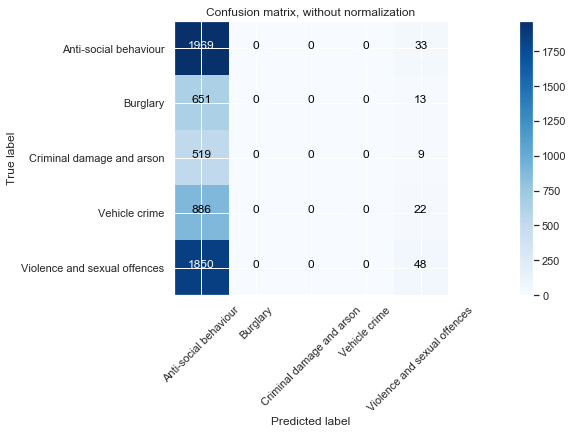

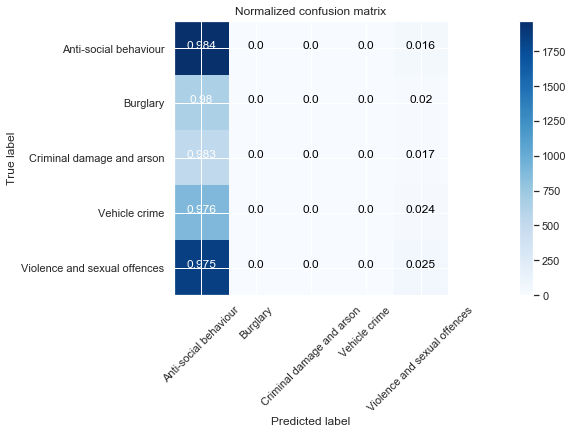

In [94]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=cat_encoder2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=cat_encoder2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### K-Nearest Neighbors

In [97]:
knn_list = []


In [98]:
knnNoPrice_list = []

In [99]:

n_neighbors=100
weights='uniform'
algorithm='ball_tree'
metric='jaccard'

scaler = preprocessing.StandardScaler().fit(features_trainNoPrice)

knn=KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights,algorithm=algorithm)
knn.fit(scaler.transform(features_trainNoPrice),y_trainNoPrice)

predsKNN = knn.predict(scaler.transform(features_trainNoPrice))
predKNNProb = knn.predict_proba(scaler.transform(features_testNoPrice))

# Use the KNN's predict method on the test data
# Calculate the absolute errors
errorsKNN = abs(predsKNN - y_trainNoPrice)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsBoost), 4), 'degrees.')

#Log loss
logLossKNN = log_loss(y_trainNoPrice, predKNNProb) 
print('Log loss:', round(np.mean(logLossKNN), 4), 'degrees.')
knn_list.append([n_neighbors, weights, algorithm, metric, 
                 round(np.mean(logLossKNN),4), round(np.mean(errorsBoost),4)])

Mean Absolute Error: 1.9303 degrees.
Log loss: 1.484 degrees.


In [ ]:
#save to df
# knn_df = pd.DataFrame(knn_list, columns=['N_Neighbors', 'Weights', 'Algorithm', 'metric', 'LogLoss','Mean Absolute Error'])
# knnNoPrice_df = pd.DataFrame(knnNoPrice_list, columns=['N_Neighbors', 'Weights', 'Algorithm', 'metric', 'LogLoss','Mean Absolute Error'])

### Logistic Regression

In [100]:
LogisticNoPrice_list = []

In [101]:
Logistic_list = []

In [102]:

random_state=42
solver='saga'
multi_class = 'multinomial'
logis = LogisticRegression(random_state=random_state, solver=solver,multi_class=multi_class)
logis.fit(features_trainNoPrice, y_trainNoPrice)
predsLogis = logis.predict(features_testNoPrice)
predLogisProb = np.array(logis.predict_proba(features_testNoPrice))

# Use the forest's predict method on the test data
# Calculate the absolute errors
errorsLogis = abs(predsLogis - y_trainNoPrice)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errorsLogis), 4), 'degrees.')

#Log loss
logLossLogis = log_loss(y_trainNoPrice, predLogisProb) 
print('Log loss:', round(np.mean(predLogisProb), 4), 'degrees.')

LogisticNoPrice_list.append([random_state, solver, multi_class, 
                     round(np.mean(logLossLogis),4), round(np.mean(errorsLogis),4)])

Mean Absolute Error: 1.9163 degrees.
Log loss: 0.2 degrees.


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### PCA
#### Principal Component Analysis will help us reduce dimensionality and have a more accurate model

In [103]:
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(features_train)
scaledData = scaler.transform(features_train)
scaledData

array([[ 0.53,  0.55,  0.2 , ...,  0.06, -0.55, -0.04],
       [ 0.22,  1.08,  0.2 , ...,  0.06, -0.34, -0.09],
       [ 0.24,  1.38,  0.2 , ...,  0.06, -0.34, -0.04],
       ...,
       [ 0.54, -1.16,  0.2 , ...,  0.06,  0.58, -0.61],
       [-1.6 ,  1.18,  0.2 , ...,  0.06, -0.24, -0.37],
       [ 1.82, -0.54,  0.2 , ...,  0.06, -1.47, -0.82]])

In [107]:
pca = PCA(n_components=5)
pca.fit(scaledData)
X_pca = pca.transform(scaledData)

In [108]:
print(pca.explained_variance_)


[1.39 1.09 1.03 1.   0.96]


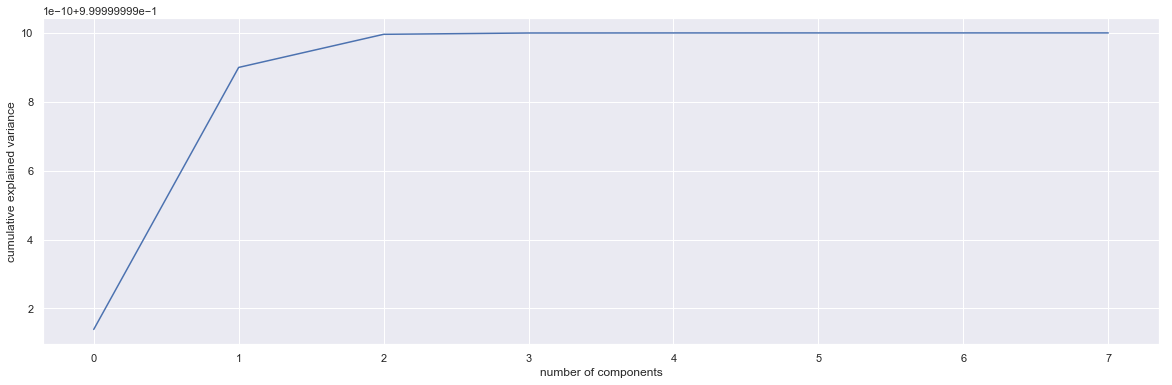

In [109]:
#Choosing the number of components
pca = PCA().fit(features_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');